# ML Final Project
* song genre classification
* Fall 2022

## Connect G Drive

In [ ]:
# Amir
from google.colab import drive
drive.mount('/content/drive')
%cd /drive/MyDrive/project/

Mounted at /content/drive
[Errno 2] No such file or directory: '/drive/MyDrive/project/'
/content


In [ ]:
%cd drive/MyDrive/project/

/content/drive/.shortcut-targets-by-id/1_HEwwNwDPm0G_J2KaUIatZhAPrkaA-k5/project


In [ ]:
!pwd

/content/drive/.shortcut-targets-by-id/1_HEwwNwDPm0G_J2KaUIatZhAPrkaA-k5/project


In [ ]:
%pwd

'/content/drive/.shortcut-targets-by-id/1_HEwwNwDPm0G_J2KaUIatZhAPrkaA-k5/project'

In [ ]:
%ls

cluster  data/  Main_project  report/


In [ ]:
# Kasra
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Mech/ML/project/
%pwd

Mounted at /content/drive
/content/drive/MyDrive/Mech/ML/project


'/content/drive/MyDrive/Mech/ML/project'

turn off warnings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Import Libraries

In [ ]:
!pip install AudioSegment

     |████████████████████████████████| 66 kB 2.9 MB/s 
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp37-cp37m-linux_x86_64.whl size=72323 sha256=86973b8bd83ac51e425fc5de58d78ef1d3c4d22e2c21d2df965a068a7a7006eb
  Stored in directory: /root/.cache/pip/wheels/11/f9/67/a3158d131f57e1c0a7d8d966a707d4a2fb27567a4fe47723ad
Successfully built webrtcvad


In [ ]:
!pip install mutagen

     |████████████████████████████████| 218 kB 5.4 MB/s 


In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
# from pydub import AudioSegment
from mutagen.mp3 import MP3

In [ ]:
!ls

Bandari_kossher.ipynb  Gilaki_kossher.ipynb  Main_project.ipynb
cluster		       Kordi_kossher.ipynb   report
data		       Lori_kossher.ipynb    Torki_kossher.ipynb


In [ ]:
!pwd

/content/drive/MyDrive/Mech/ML/project


## Loading raw data (music files)

In [ ]:
class loadSongs:
    def __init__(self, path):
        self.dir = path
        self.data = pd.DataFrame()

    def readSongs(self, complete):
        data_list = list('')
        if complete:
            for label in tqdm(os.listdir(self.dir)):
                file_path = self.dir + '/' + label
                start = time.time()
                for pth in os.listdir(file_path): 
                    try:
                        final_path = file_path + '/' + pth
                        
                        if label == 'Torki':
                            y = 0
                        elif label == 'Lori':
                            y = 1
                        elif label == 'Kordi':
                            y = 2
                        elif label == 'Gilaki':
                            y = 3
                        else:
                            y = 4

                        len = MP3(final_path).info.length
                        # duration = 30   # sec
                        chunks = 5
                        duration = int(len/chunks)

                        for i in range(int(len/duration)):
                            audio, sr = librosa.load(final_path, offset = i * duration, duration = duration)
                            feature = self.getFeatures(audio, sr, y)
                            data_list.append(feature.flatten())

                    except:
                        print("Error in file", pth)
                        pass
                    
                print('Elapsed time for ' + label + ' = ', time.time() - start, 's')
        else:
            for label in tqdm(os.listdir(self.dir)):
                file_path = self.dir + '/' + label
                sample = 0
                start = time.time()
                for pth in os.listdir(file_path): 
                    try:
                        final_path = file_path + '/' + pth
                        
                        if label == 'Torki':
                            y = 0
                        elif label == 'Lori':
                            y = 1
                        elif label == 'Kordi':
                            y = 2
                        elif label == 'Gilaki':
                            y = 3
                        else:
                            y = 4

                        len = MP3(final_path).info.length
                        # duration = 30   # sec
                        chunks = 5
                        duration = int(len/chunks)

                        for i in range(int(len/duration)):
                            audio, sr = librosa.load(final_path, offset = i * duration, duration = duration)
                            feature = self.getFeatures(audio, sr, y)
                            data_list.append(feature.flatten())
                    
                        sample += 1
                        if(sample == 1):
                            break
                    except:
                        print("Error in file", pth)
                        pass
                    
                print('Elapsed time for ' + label + ' = ', time.time() - start, 's')
            pass
        
        self.data = pd.DataFrame(data_list)
        return self.data

    def readFolder(self, genre):
        data_list = list('')
        file_path = self.dir + '/' + genre

        if genre == 'Torki':
                    y = 0
        elif genre == 'Lori':
            y = 1
        elif genre == 'Kordi':
            y = 2
        elif genre == 'Gilaki':
            y = 3
        else:
            y = 4
        
        start = time.time()

        for pth in os.listdir(file_path): 
            try:
                final_path = file_path + '/' + pth
                audio, sr = librosa.load(final_path)
                
                feature = self.getFeatures(audio, sr, y)
                data_list.append(feature.flatten())
            except:
                print("Error in file", pth)
                pass
        
        print('Elapsed time for ' + genre + ' = ', time.time() - start, 's')
        try:
            temp_df = pd.DataFrame(data_list)
            self.data = self.data.append(temp_df, ignore_index = True)
        except:
            self.data = pd.DataFrame(data_list)
        return True

    def split_songs(self, genre, number_of_splits=10):
        data_list = list('')
        file_path = self.dir + '/' + genre
        save_path = self.dir + '/' + genre + 'split'

        for pth in os.listdir(file_path): 
            try:
                final_path = file_path + '/' + pth
                # Opening file and extracting segment
                song = AudioSegment.from_mp3(final_path)
                audio = MP3(final_path)
                music_len = audio.info.length
                music_length_division = np.floor(music_len/number_of_splits)
                time_intervals = np.arange(0, music_len, music_length_division)
                for i in range(len(time_intervals)-1):
                    startTime = time_intervals[i]*1000
                    endTime = time_intervals[i+1]*1000

                    extract = song[startTime:endTime]

                    # Saving
                    extract.export(save_path + '/' + pth[:-4] + '_' + 'div' + '{}'.format(i) + '.mp3', format="mp3")

            except:
                print("Error in file", pth)
                pass
    
    # 97 features in total!!
    def getFeatures(self, audio, sr, label):
        chroma_stft = librosa.feature.chroma_stft(y=audio, sr=sr)
        spec_cent = librosa.feature.spectral_centroid(y=audio, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(audio)
        rmse = librosa.feature.rms(y=audio)
        tempo = librosa.beat.tempo(y=audio, sr=sr)[0]
        pulse = librosa.beat.plp(y=audio, sr=sr)
        harmony = librosa.effects.harmonic(y=audio)
        mel = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=20)
        res = np.array([np.mean(chroma_stft), np.var(chroma_stft), np.mean(spec_cent), np.var(spec_cent),
                        np.mean(spec_bw), np.var(spec_bw), np.mean(rolloff), np.var(rolloff), np.mean(zcr), 
                        np.var(zcr), np.mean(rmse), np.var(rmse), tempo, np.mean(pulse), np.var(pulse),
                        np.mean(harmony), np.var(harmony)])
        
        res = res.reshape(-1,1)
        mfcc = librosa.feature.mfcc(y=audio, sr=sr)
        # mfcc_ = np.sum(mfcc, axis=1).reshape(-1,1)
        mfcc_mean = np.mean(mfcc, axis=1).reshape(-1, 1)
        mfcc_var = np.var(mfcc, axis=1).reshape(-1, 1)
        mel_mean = np.mean(mel, axis=1).reshape(-1, 1)
        mel_var = np.var(mel, axis=1).reshape(-1, 1)
        # chroma_stft_ = np.sum(chroma_stft, axis = 1).reshape(-1,1)
        # res = np.concatenate((res, chroma_stft_), axis=0)
        res = np.concatenate((res, mfcc_mean), axis=0)
        res = np.concatenate((res, mfcc_var), axis=0)
        res = np.concatenate((res, mel_mean), axis=0)
        res = np.concatenate((res, mel_var), axis=0)
        

        res = np.concatenate((res, np.array([label]).reshape(1,1)), axis=0).T
        return res
    
    def exportCSV(self, path, genre = None):
        self.data.to_csv(path+"/data_set_" + genre + ".csv")
        return True


In [ ]:
song_reader = loadSongs('data/ML_Data G1')

In [ ]:
# Test 97 features!
song_reader.readSongs(False)

 20%|██        | 1/5 [00:39<02:39, 39.82s/it]

Elapsed time for Bandari =  39.82141327857971 s


 40%|████      | 2/5 [01:09<01:42, 34.01s/it]

Elapsed time for Gilaki =  29.931912660598755 s


 60%|██████    | 3/5 [01:46<01:10, 35.31s/it]

Elapsed time for Kordi =  36.846853494644165 s
Error in file 156.mp3


 80%|████████  | 4/5 [02:08<00:30, 30.14s/it]

Elapsed time for Lori =  22.214083909988403 s


100%|██████████| 5/5 [02:43<00:00, 32.76s/it]

Elapsed time for Torki =  34.96717309951782 s


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97
0,0.315665,0.102414,1473.855285,6.496195e+05,1824.586543,286420.633726,2903.396759,2.824868e+06,0.055426,0.003417,0.096467,0.002892,117.453835,0.146812,0.047058,1.839422e-06,0.006708,-227.439240,122.359238,-1.712199,19.521511,-2.915547,4.525899,-6.430746,-0.964964,-4.414561,2.656301,3.476999,-6.198133,-9.368309,-8.660667,-6.862947,-2.866299,-6.045479,-3.889570,0.833726,-0.099642,10573.567383,1737.325195,1448.284546,...,10.428707,6.386094,3.262540,2.600598,0.762703,0.898501,0.876867,0.574408,0.137555,0.086995,0.080968,0.052743,0.038896,0.015283,0.017194,0.016835,0.014128,0.009061,0.006380,2009.871460,146.855118,146.231384,65.239784,22.676641,2.207086,16.323376,9.652567,3.697948,0.053766,0.020188,0.018827,0.013364,0.006904,0.003197,0.005692,0.007977,0.008319,0.004313,1.881332e-03,4.0
1,0.411608,0.087962,1506.887432,4.509106e+05,1963.599493,254361.709169,3233.551712,2.400513e+06,0.045454,0.000857,0.183847,0.005128,117.453835,0.214040,0.073603,-2.697188e-06,0.021266,-128.537048,126.385506,-2.431932,30.803539,4.196170,13.457434,-0.854102,6.511106,-0.567766,7.299542,1.768645,-0.491191,-6.260953,-3.778642,-5.538698,1.754056,-2.468894,3.407449,5.354712,2.881200,4867.224609,853.444275,426.050720,...,16.461906,7.662447,4.624880,5.051849,1.570237,1.458970,1.320343,0.850674,0.607247,0.427897,0.295173,0.185923,0.113535,0.057224,0.046712,0.037390,0.026309,0.019323,0.012981,6376.274902,276.732422,109.579483,95.011955,59.314369,8.631461,9.471013,9.128503,3.038402,2.000061,1.671906,1.102998,0.440636,0.088032,0.032510,0.012733,0.010558,0.005864,0.003949,2.392686e-03,4.0
2,0.520885,0.074824,1371.498488,3.522116e+05,1888.667943,266502.962846,2906.367188,2.452130e+06,0.041670,0.000573,0.304407,0.006831,117.453835,0.170991,0.065994,-8.390654e-07,0.055684,-79.521706,144.181351,-2.442474,23.833914,10.811145,6.582091,7.296647,14.434158,-11.811345,16.335463,3.466914,8.743523,2.288168,4.067351,-5.479952,6.045996,-2.746624,4.229929,4.689543,4.254351,5188.048828,1471.044189,236.544647,...,28.756239,18.046612,16.730881,8.182454,4.219635,4.936402,3.617728,2.083824,1.408340,0.986571,0.896405,0.589024,0.367623,0.156042,0.105118,0.084848,0.068474,0.049171,0.020874,30144.082031,708.930847,383.596710,404.977905,116.050850,33.022411,24.453421,33.152603,14.381531,11.796415,5.478922,4.759397,1.714655,0.392185,0.133203,0.069672,0.040541,0.020513,0.008778,2.389677e-03,4.0
3,0.490615,0.080436,1779.164772,3.611243e+05,2319.589945,142814.549526,4035.586624,2.465283e+06,0.060116,0.001117,0.322858,0.006651,117.453835,0.242833,0.089869,-1.250324e-05,0.053645,-36.522308,114.578781,5.516127,24.647879,9.637735,15.674190,1.401626,11.213398,-3.284181,12.763368,2.715015,4.665394,-2.204587,6.557975,0.946625,3.377311,-3.329737,-0.193256,2.334016,-0.504405,2964.412109,470.456085,155.251633,...,40.034058,23.917191,14.548554,7.951710,6.285398,4.160355,3.395165,3.368740,1.527408,1.050764,0.948159,0.618705,0.424684,0.211097,0.174807,0.150085,0.144417,0.122320,0.048138,35669.910156,1008.134155,778.744080,285.836243,104.225861,289.963715,39.830544,29.726612,20.433872,3.916511,2.625681,1.991870,0.695620,0.422427,0.103550,0.091354,0.075122,0.048129,0.040763,1.532892e-02,4.0
4,0.349036,0.088395,1530.035974,1.975490e+05,1907.690240,176406.073100,3046.323395,1.321332e+06,0.062788,0.000578,0.216074,0.016211,117.453835,0.197288,0.065901,-1.897434e-06,0.034963,-124.571892,121.567299,-11.307511,17.102316,5.065482,4.130573,-5.206493,4.783494,-1.071818,6.415109,-4.366140,-1.418359,-4.219037,1.372711,-3.834469,0.556095,-1.058530,4.097145,3.277665,4.877047,19408.162109,1792.581177,253.308624,...,33.390118,19.639347,13.258681,9.652614,7.282542,5.990309,2.988452,3.814933,2.657673,2.221476,0.908489,0.376241,0.134103,0.080070,0.053749,0.040994,0.032021,0.023880,0.012886,190

## Feature Extraction

In [ ]:
song_reader.readFolder('Bandari')
song_reader.exportCSV('data', 'Bandari')

Error in file 22.mp3
Elapsed time for Bandari =  5090.098835468292 s


True

In [ ]:
song_reader.readFolder('Torki')
song_reader.exportCSV('data', 'Torki')

Error in file 104.mp3
Elapsed time for Torki =  4746.517866849899 s


True

In [ ]:
song_reader.readFolder('Lori')
song_reader.exportCSV('data', 'Lori')

Error in file 156.mp3
Error in file 97.mp3
Error in file 70.mp3
Error in file 245.mp3
Error in file 75.mp3
Error in file 227.mp3
Error in file 84.mp3
Error in file 241.mp3
Error in file 153.mp3
Error in file 89.mp3
Elapsed time for Lori =  5219.438491821289 s


True

In [ ]:
song_reader.readFolder('Gilaki')
song_reader.exportCSV('data', 'Gilaki')

Elapsed time for Gilaki =  4637.1389400959015 s


True

In [ ]:
song_reader.readFolder('Kordi')
song_reader.exportCSV('data', 'Kordi')

Error in file 79.mp3
Elapsed time for Kordi =  5405.713188648224 s


True

In [ ]:
print(song_reader.data)

Usseless attempt to save features:

In [ ]:
song_reader = loadSongs('data/ML_Data G1')
start = time.time()
song_reader.readSongs(True)
print("Execution time = ", time.time() - start, "s")
song_reader.exportCSV('data')

  0%|          | 0/5 [00:00<?, ?it/s]

Error in file 98.mp3
Error in file 227.mp3
Error in file 22.mp3


 20%|██        | 1/5 [1:24:37<5:38:29, 5077.38s/it]

Elapsed time for Bandari =  5077.380407810211 s


 40%|████      | 2/5 [2:40:44<3:58:50, 4776.95s/it]

Elapsed time for Gilaki =  4566.636818647385 s


 60%|██████    | 3/5 [4:09:11<2:47:17, 5018.97s/it]

Elapsed time for Kordi =  5306.9642333984375 s
Error in file 156.mp3
Error in file 89.mp3


 80%|████████  | 4/5 [5:37:32<1:25:30, 5130.49s/it]

Elapsed time for Lori =  5301.453799962997 s


Combining data

In [ ]:
!pwd

/content/drive/.shortcut-targets-by-id/1_HEwwNwDPm0G_J2KaUIatZhAPrkaA-k5/project


In [ ]:
%cd data

/content/drive/.shortcut-targets-by-id/1_HEwwNwDPm0G_J2KaUIatZhAPrkaA-k5/project/data


In [ ]:
!ls

 combined_csv.csv	 data_set_Kordi.csv	     'ML_Data G1'
 combined_csv.gsheet	 data_set_Lori2.csv	     'ML_Data G1.rar'
 data_set_Bandari2.csv	 data_set_Lori.csv	      view
 data_set_Bandari.csv	 data_set_test_features.csv  'view?usp=sharing'
 data_set_Gilaki2.csv	 data_set_Torki1.csv	     'view?usp=sharing.1'
 data_set_Gilaki.csv	 data_set_Torki.csv
 data_set_Kordi2.csv	 download_data.ipynb


In [ ]:
all_filenames = ['data_set_Bandari2.csv', 'data_set_Gilaki2.csv', 'data_set_Kordi2.csv', 'data_set_Lori2.csv', 'data_set_Torki.csv']

In [ ]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv2.csv", index=False, encoding='utf-8-sig')

In [ ]:
%cd ..

/content/drive/.shortcut-targets-by-id/1_HEwwNwDPm0G_J2KaUIatZhAPrkaA-k5/project


## Pre-process

In [ ]:
from sklearn.model_selection import train_test_split

names = ['data/data_set_Bandari.csv', 'data/data_set_Gilaki.csv', 'data/data_set_Kordi.csv', 
         'data/data_set_Lori.csv', 'data/data_set_Torki.csv', 'data/combined_csv2.csv']

X_train = list('')
Y_train = list('')
X_test = list('')
Y_test = list('')

for file_name in names:
    df = pd.read_csv(file_name)
    df = df.drop(df.columns[0], axis=1)
    df = df.to_numpy()
    x = df[:,:-1]
    y = df[:,-1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
    X_train.append(x_train)
    Y_train.append(y_train.reshape(-1,1))
    X_test.append(x_test)
    Y_test.append(y_test.reshape(-1,1))

x_train = np.vstack((X_train[0], X_train[1]))
x_train = np.vstack((x_train, X_train[2]))
x_train = np.vstack((x_train, X_train[3]))
x_train = np.vstack((x_train, X_train[4]))
x_train = np.vstack((x_train, X_train[5]))

x_test = np.vstack((X_test[0], X_test[1]))
x_test = np.vstack((x_test, X_test[2]))
x_test = np.vstack((x_test, X_test[3]))
x_test = np.vstack((x_test, X_test[4]))
x_test = np.vstack((x_test, X_test[5]))

y_train = np.vstack((Y_train[0], Y_train[1]))
y_train = np.vstack((y_train, Y_train[2]))
y_train = np.vstack((y_train, Y_train[3]))
y_train = np.vstack((y_train, Y_train[4]))
y_train = np.vstack((y_train, Y_train[5]))

y_test = np.vstack((Y_test[0], Y_test[1]))
y_test = np.vstack((y_test, Y_test[2]))
y_test = np.vstack((y_test, Y_test[3]))
y_test = np.vstack((y_test, Y_test[4]))
y_test = np.vstack((y_test, Y_test[5]))

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7335, 97) (817, 97) (7335, 1) (817, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
# scaler.fit(x_test)
x_test_std = scaler.transform(x_test)
print(x_train.shape, x_test.shape)

(7335, 97) (817, 97)


reduce dimention (PCA) and visualize

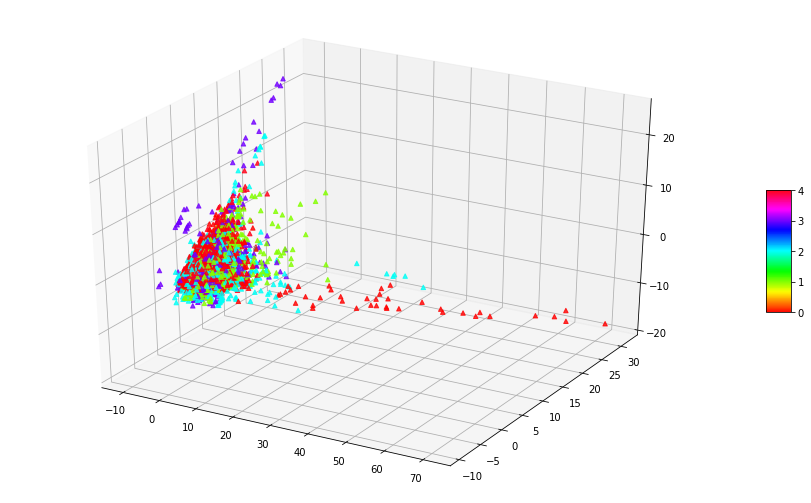

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3, random_state=1)
pca.fit(x_train_std)
x_pca_train = pca.transform(x_train_std)

fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.3, alpha = 0.2)
my_cmap = plt.get_cmap('hsv')

sctt = ax.scatter3D(x_pca_train[:,0], x_pca_train[:,1], x_pca_train[:,2],
                    alpha = 0.8, c = y_train, cmap = my_cmap, marker ='^')
fig.colorbar(sctt, ax = ax, shrink = 0.25, aspect = 5)
plt.show()


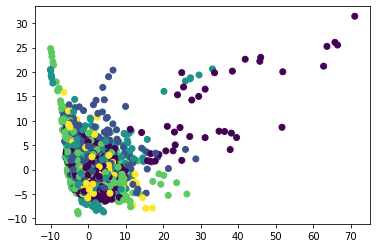

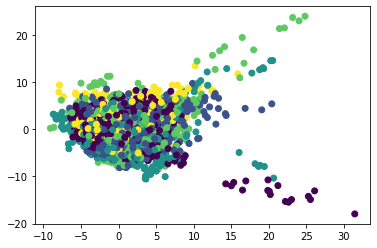

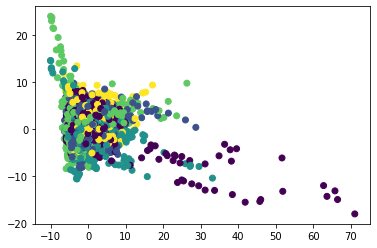

In [ ]:
plt.scatter(x_pca_train[:,0],x_pca_train[:,1], c = y_train)
plt.show()
plt.scatter(x_pca_train[:,1],x_pca_train[:,2], c = y_train)
plt.show()
plt.scatter(x_pca_train[:,0],x_pca_train[:,2], c = y_train)
plt.show()

reduce dimention (LDA) and visualize

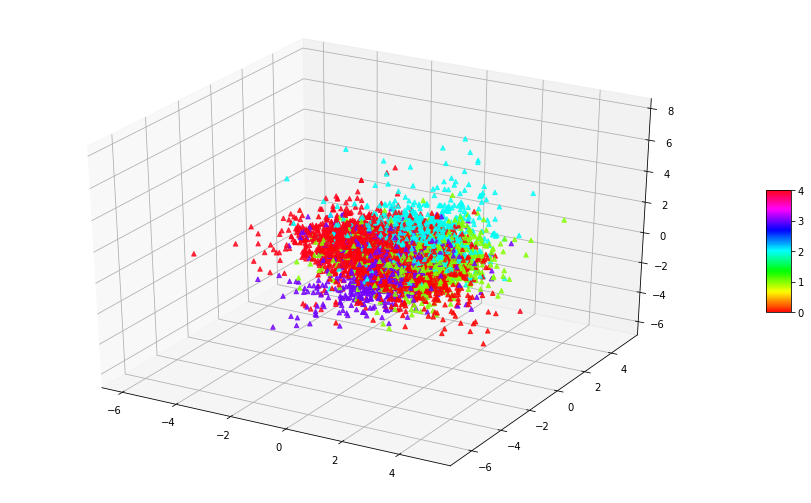

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 3)
x_lda_train = lda.fit_transform(x_train_std, y_train)


fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")

ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.3, alpha = 0.2)
my_cmap = plt.get_cmap('hsv')

sctt = ax.scatter3D(x_lda_train[:,0], x_lda_train[:,1], x_lda_train[:,2],
                    alpha = 0.8, c = y_train, cmap = my_cmap, marker ='^')
fig.colorbar(sctt, ax = ax, shrink = 0.25, aspect = 5)
plt.show()

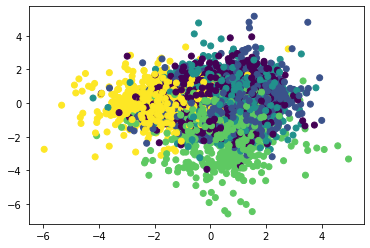

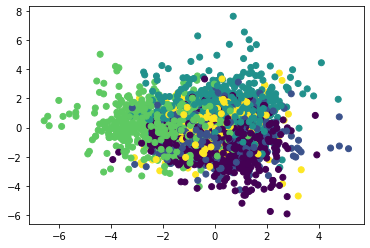

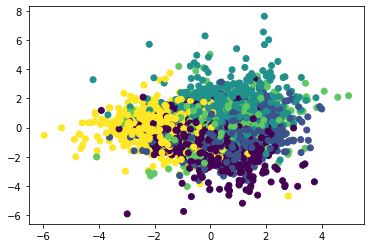

In [ ]:
plt.scatter(x_lda_train[:,0],x_lda_train[:,1], c = y_train)
plt.show()
plt.scatter(x_lda_train[:,1],x_lda_train[:,2], c = y_train)
plt.show()
plt.scatter(x_lda_train[:,0],x_lda_train[:,2], c = y_train)
plt.show()

## Classification Algorithms

### Algorithms: SVM, MLP, KNN

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
import torch
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [ ]:
class Classification:
  def __init__(self, X_train, y_train, X_test, y_test):
    self.X_train = X_train
    self.y_train = y_train
    self.X_test = X_test
    self.y_test = y_test

  def evaluate_model(self, y_pred, model_type):
    # acc
    acc = accuracy_score(self.y_test, y_pred)
    print("accuracy" + model_type + ": ", acc, '\n')
    print('classification' + model_type + 'report: ', '\n', classification_report(self.y_test, y_pred), '\n')

    #Generate the confusion matrix
    cf_matrix = confusion_matrix(self.y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title('Confusion Matrix for ' + model_type)
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values')

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Torki','Lori','Kordi','Gilaki','Bandari'])
    ax.yaxis.set_ticklabels(['Torki','Lori','Kordi','Gilaki','Bandari'])
    plt.show()
    

  # decision_function_shape = {‘ovo’, ‘ovr’}, (one vs. one & one vs. rest)
  def svmClassifier(self, regularization, kernel, degree_poly=3, gamma='scale', decision_function_shape='ovo'):
    if kernel != 'poly':
      svmModel = SVC(kernel=kernel, gamma=gamma, C=regularization, decision_function_shape= decision_function_shape)
    elif kernel == 'poly':
      svmModel = SVC(kernel=kernel, gamma=gamma, C=regularization, decision_function_shape= decision_function_shape, degree=degree_poly)

    svmModel.fit(self.X_train, self.y_train)
    # prediction
    y_pred = svmModel.predict(self.X_test)

    # eval model
    self.evaluate_model(y_pred, "SVM")

  def mlp_classifier(self, input_size, hidden_layer_size=[128, 64, 32], activations = [torch.nn.ReLU(), torch.nn.ReLU(), torch.nn.ReLU()], output_size=5, dropout = 0.2):
    # define the model
    model = torch.nn.Sequential()
    # add the input layer
    model.add_module("input", torch.nn.Linear(input_size, hidden_layer_size[0]))
    # add the hidden layers
    for i in range(len(hidden_layer_size)-1):
      model.add_module("hidden_layer_" + str(i), activations[i])
      model.add_module("hidden_layer_" + str(i) + "_" + str(hidden_layer_size[i]), torch.nn.Linear(hidden_layer_size[i], hidden_layer_size[i+1]))
      # Dropout layer
      model.add_module("dropout_" + str(i), torch.nn.Dropout(p=dropout))
    # add the output layer with softmax activation
    model.add_module("output", torch.nn.Linear(hidden_layer_size[-1], output_size))
    model.add_module("softmax", torch.nn.Softmax(dim=1))
    return model

  # train the model
  def train_model(self, model, epochs=100, lr=0.001, batch_size=64, device="cpu"):
    loss_total = []
    epoch_number = []
    y_train = self.y_train.reshape(-1, 1)
    X_train = self.X_train.reshape(-1, 97)
    # define the loss function and optimizer
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    # move the model to the device
    model.to(device)
    # define the number of steps
    steps = 0
    # train the model
    for epoch in range(epochs):
      running_loss = 0.0
      # define the number of batches
      n_batches = int(X_train.shape[0] / batch_size)

      for i in range(n_batches):
        # get the inputs
        inputs = torch.from_numpy(X_train[i*batch_size:(i+1)*batch_size]).float()
        labels = torch.from_numpy(y_train[i*batch_size:(i+1)*batch_size]).long()
        # move the inputs and labels to the device
        inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = model(inputs)
        labels = labels.squeeze(1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        steps += 1
        if steps % 100 == 99:
          print('Epoch number: %d , loss: %.3f' %
            (epoch + 1, running_loss / 100))
          loss_total.append(running_loss / 100)
          epoch_number.append(epoch + 1)
          running_loss = 0.0
    # evaluate the model
    model.eval()
    correct = 0
    total = 0
    predicted_all = []
    with torch.no_grad():
      for i in range(0, self.X_test.shape[0], batch_size):
        # get the inputs
        inputs = torch.from_numpy(self.X_test[i:i+batch_size]).float()
        labels = torch.from_numpy(self.y_test[i:i+batch_size]).int()
        # move the inputs and labels to the device
        inputs, labels = inputs.to(device), labels.to(device)
        # forward
        outputs = model(inputs)
        predicted = torch.argmax(outputs, dim=1).reshape(-1, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        predicted_all.append(predicted.cpu().numpy())
    pred = []
    for i in predicted_all:
      for j in i:
        pred.append(j)

    self.evaluate_model(pred, "MLP")

    plt.plot(epoch_number, loss_total)
    plt.xlabel("Epoch Number")
    plt.ylabel("Loss")
    plt.title("Epoch vs. Loss")
    plt.show()

  def knnClassifier(self, n_neighbors):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(self.X_train, self.y_train)
    y_pred = knn.predict(self.X_test)
    self.evaluate_model(y_pred, "KNN")



In [ ]:
# lda = LDA(n_components=4)
# x_train_std_reduced = lda.fit_transform(x_train_std, y_train)
# x_test_std_reduced = lda.transform(x_test_std)

In [ ]:
classifier = Classification(x_train_std, y_train, x_test_std, y_test)
# classifier = Classification(x_train_std_reduced, y_train, x_test_std_reduced, y_test)

### 1) SVM

accuracySVM:  0.8959608323133414 

classificationSVMreport:  
               precision    recall  f1-score   support

         0.0       0.89      0.90      0.89       172
         1.0       0.87      0.87      0.87       155
         2.0       0.93      0.90      0.92       167
         3.0       0.90      0.87      0.89       160
         4.0       0.88      0.94      0.91       163

    accuracy                           0.90       817
   macro avg       0.90      0.90      0.90       817
weighted avg       0.90      0.90      0.90       817
 



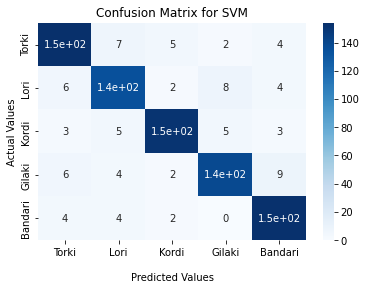

In [ ]:
classifier.svmClassifier(15, 'rbf')

accuracySVM:  0.594859241126071 

classificationSVMreport:  
               precision    recall  f1-score   support

         0.0       0.55      0.59      0.57       172
         1.0       0.58      0.43      0.50       155
         2.0       0.62      0.67      0.65       167
         3.0       0.59      0.54      0.57       160
         4.0       0.62      0.73      0.67       163

    accuracy                           0.59       817
   macro avg       0.59      0.59      0.59       817
weighted avg       0.59      0.59      0.59       817
 



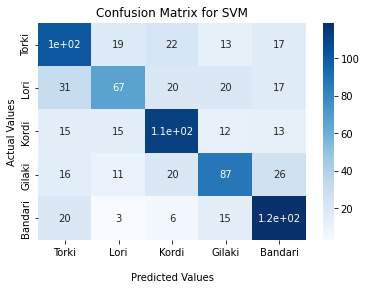

In [ ]:
classifier.svmClassifier(5, 'linear', gamma='scale', decision_function_shape='ovo')

### 2) MLP

Epoch number: 1 , loss: 1.662
Epoch number: 2 , loss: 1.383
Epoch number: 3 , loss: 1.148
Epoch number: 4 , loss: 0.909
Epoch number: 5 , loss: 0.639
Epoch number: 6 , loss: 0.396
Epoch number: 7 , loss: 0.178
Epoch number: 8 , loss: 0.012
Epoch number: 8 , loss: 1.552
Epoch number: 9 , loss: 1.342
Epoch number: 10 , loss: 1.107
Epoch number: 11 , loss: 0.882
Epoch number: 12 , loss: 0.649
Epoch number: 13 , loss: 0.413
Epoch number: 14 , loss: 0.195
Epoch number: 15 , loss: 0.036
Epoch number: 15 , loss: 1.488
Epoch number: 16 , loss: 1.322
Epoch number: 17 , loss: 1.101
Epoch number: 18 , loss: 0.874
Epoch number: 19 , loss: 0.640
Epoch number: 20 , loss: 0.420
Epoch number: 21 , loss: 0.213
Epoch number: 22 , loss: 0.058
Epoch number: 22 , loss: 1.376
Epoch number: 23 , loss: 1.244
Epoch number: 24 , loss: 1.044
Epoch number: 25 , loss: 0.835
Epoch number: 26 , loss: 0.628
Epoch number: 27 , loss: 0.427
Epoch number: 28 , loss: 0.236
Epoch number: 29 , loss: 0.080
Epoch number: 29 ,

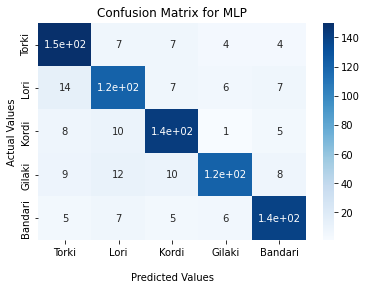

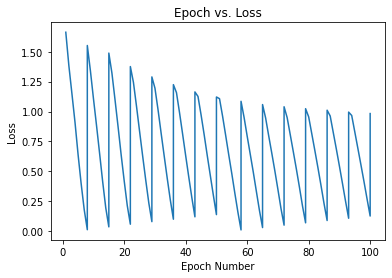

In [ ]:
# mlpMpdel = classifier.mlp_classifier(46, output_size=5)
mlpMpdel = classifier.mlp_classifier(97, hidden_layer_size=[1024, 528, 256], activations = [torch.nn.ReLU(), torch.nn.ReLU(), torch.nn.ReLU(), torch.nn.ReLU()], output_size=5, dropout = 0.2)
classifier.train_model(mlpMpdel, epochs=100, lr=0.0001, batch_size=64, device="cpu")

### 3) KNN

accuracyKNN:  0.9485924112607099 

classificationKNNreport:  
               precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       172
         1.0       0.96      0.93      0.94       155
         2.0       0.96      0.96      0.96       167
         3.0       0.94      0.95      0.95       160
         4.0       0.93      0.97      0.95       163

    accuracy                           0.95       817
   macro avg       0.95      0.95      0.95       817
weighted avg       0.95      0.95      0.95       817
 



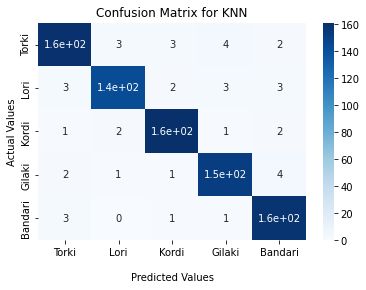

In [ ]:
classifier.knnClassifier(1)

## Clustering Algorithms

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, homogeneity_score
from sklearn.metrics.cluster import homogeneity_score
import scipy.cluster.hierarchy as shc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
class Clustering:
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def KMeans_clustering(self, repeats, max_iter):
        km = KMeans(n_clusters=5, init='k-means++', n_init=repeats, max_iter=max_iter, tol=1e-04, random_state=1)
        labels = km.fit_predict(self.X_train)
        self.visulize(labels)
    	
        return True
	
    def Heirarchial_clustering(self, linkage, metric):
        # Dendogram
        plt.figure(figsize =(20, 8))
        plt.gcf().set_dpi(100)
        plt.title('Visualising the data')
        Dendrogram = shc.dendrogram((shc.linkage(self.X_train, method =linkage, metric=metric)))
        # Clustering
        ac = AgglomerativeClustering(n_clusters = 5, affinity=metric, linkage=linkage)
        labels = ac.fit_predict(self.X_train)
        self.visulize(labels)
	
    def DBSSCAN_clustering(self, epsilon, sample):
        db = DBSCAN(eps = epsilon, min_samples=sample).fit(self.X_train)
        self.visulize(db.labels_)
	

    def visulize(self, labels):
        ## Print Model Scores
        try:
            score = silhouette_score(self.X_train, labels)
            print("Silhouette Score is ", score)
        except:
            print("Not enough Clusters")

        ## Print Ground truth Score
        print("Purity Measure is ",homogeneity_score(labels, self.y_train.flatten()))

        lda = LDA(n_components = 3)
        x_lda = lda.fit_transform(self.X_train, self.y_train)


        fig = plt.figure(figsize = (16, 9))
        ax = plt.axes(projection ="3d")

        ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.3, alpha = 0.2)
        my_cmap = plt.get_cmap('hsv')

        sctt = ax.scatter3D(x_lda[:,0], x_lda[:,1], x_lda[:,2],
                            alpha = 0.8, c = labels, cmap = my_cmap, marker ='^')
        fig.colorbar(sctt, ax = ax, shrink = 0.25, aspect = 5)
        plt.show()

        plt.scatter(x_lda[:,0],x_lda[:,1], c = labels, alpha = 0.5)
        plt.gcf().set_dpi(100)
        plt.show()
        plt.scatter(x_lda[:,1],x_lda[:,2], c = labels, alpha = 0.5)
        plt.gcf().set_dpi(100)
        plt.show()
        plt.scatter(x_lda[:,0],x_lda[:,2], c = labels, alpha = 0.5)
        plt.gcf().set_dpi(100)
        plt.show()

In [ ]:
# X = np.vstack((x_train_std_reduced, x_test_std_reduced))
X = np.vstack((x_train_std, x_test_std))
Y = np.vstack((y_train, y_test))
model = Clustering(X, Y)

### K-Means

Silhouette Score is  0.20711210966404695
Purity Measure is  0.22869718180873513


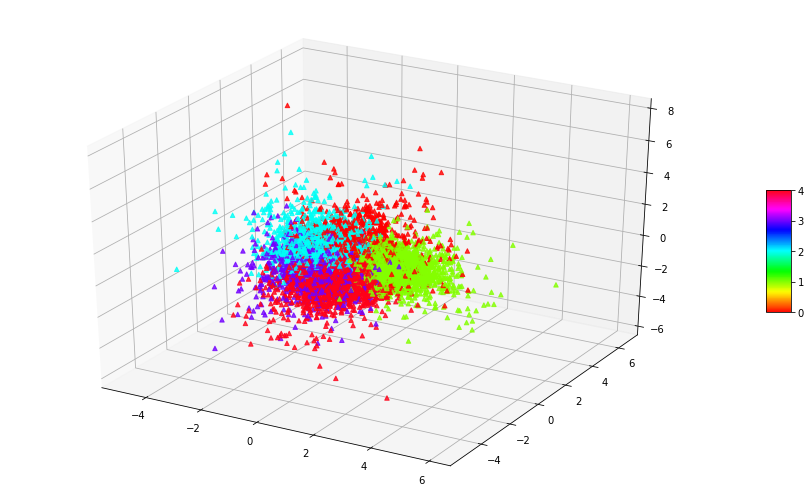

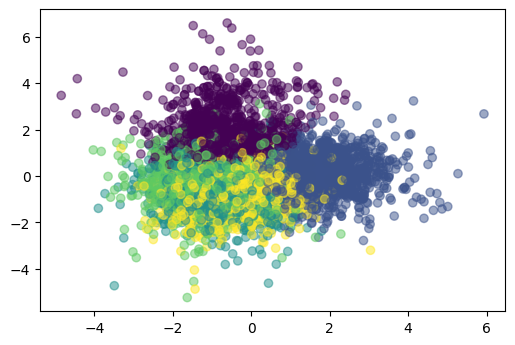

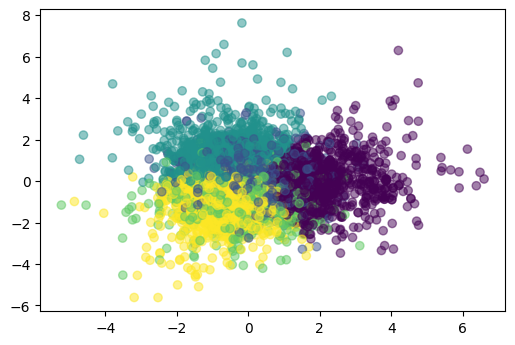

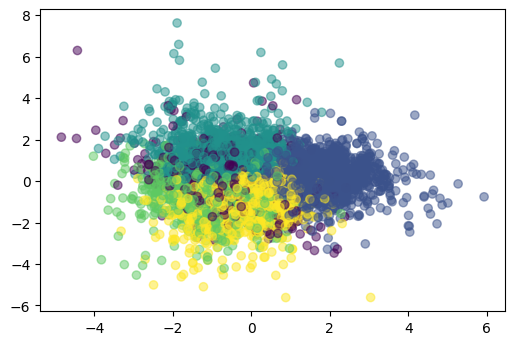

True

In [ ]:
model.KMeans_clustering(100, 1000)

### Heirarchial

In [ ]:
## Single Linkage
model.Heirarchial_clustering('single', 'euclidean')

Silhouette Score is  0.12868393012087848
Purity Measure is  0.13153908623242713


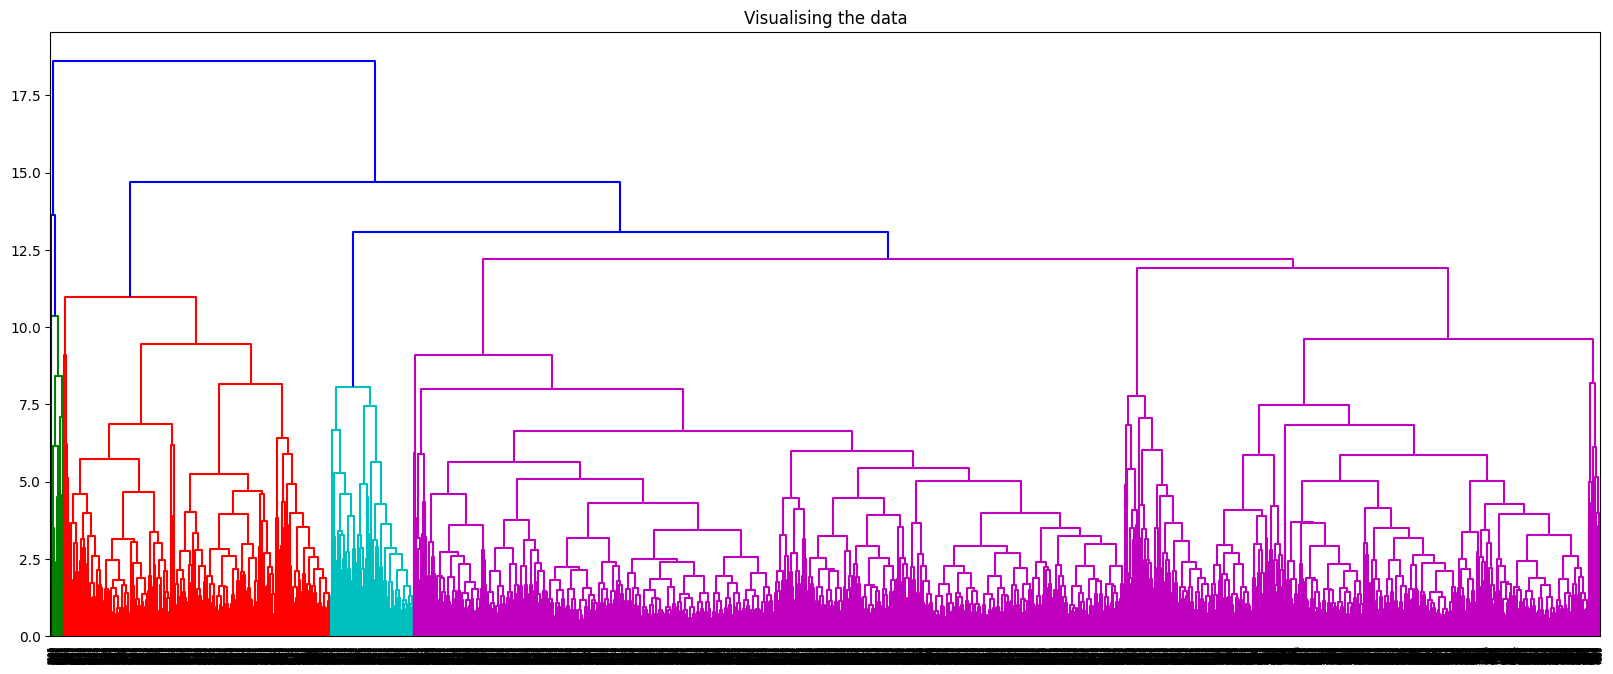

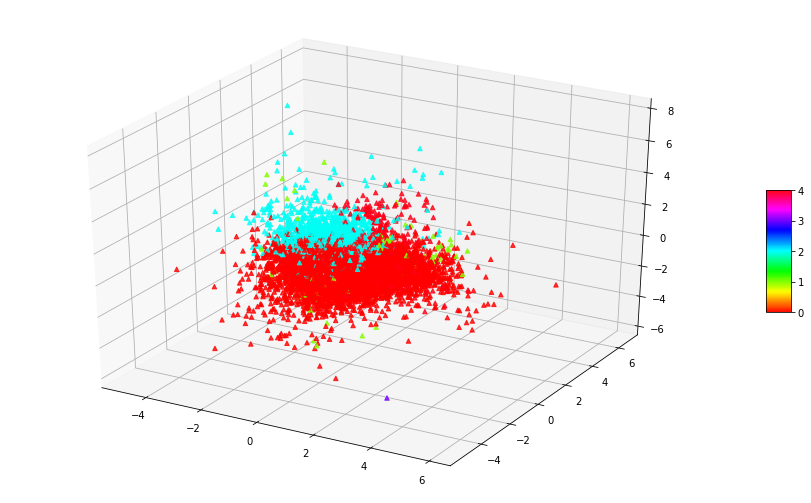

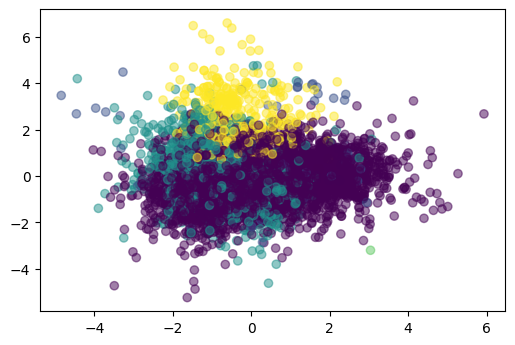

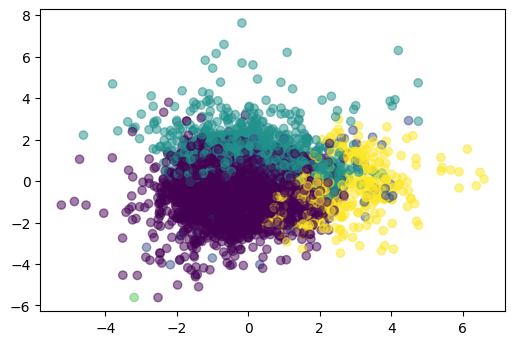

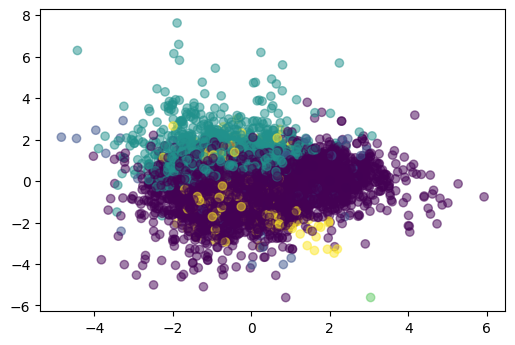

In [ ]:
## Complete Linkage
model.Heirarchial_clustering('complete', 'euclidean')

Silhouette Score is  0.5022425218352159
Purity Measure is  0.1046899989336015


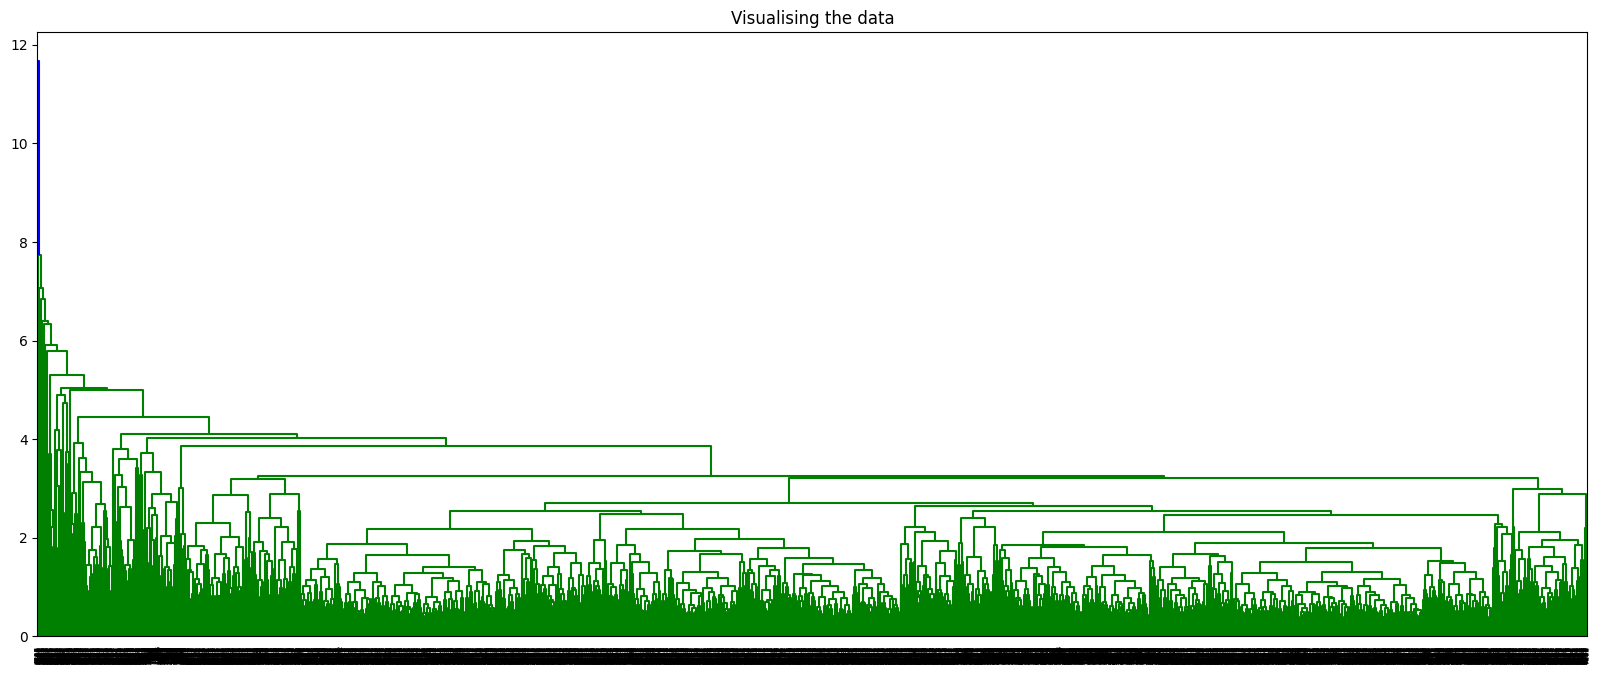

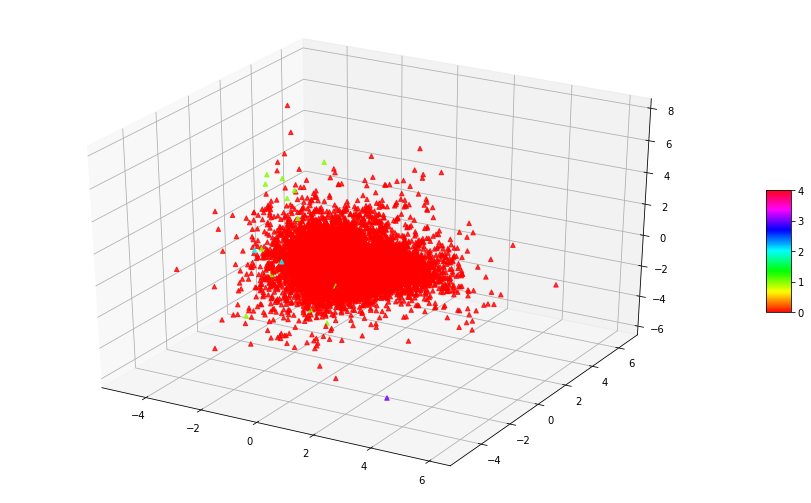

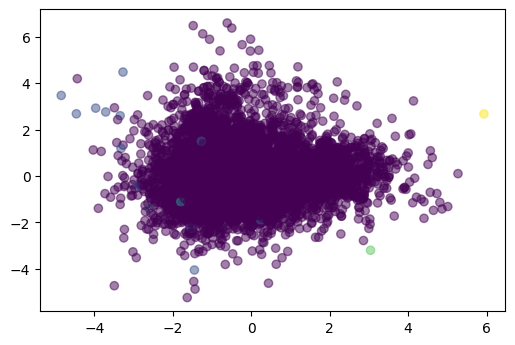

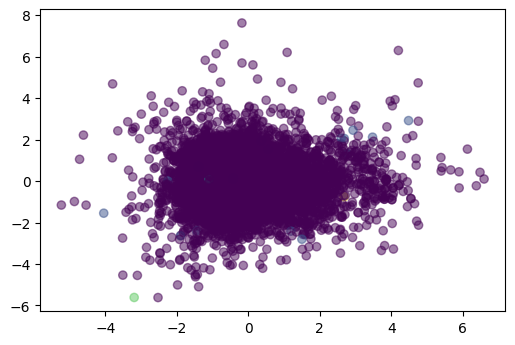

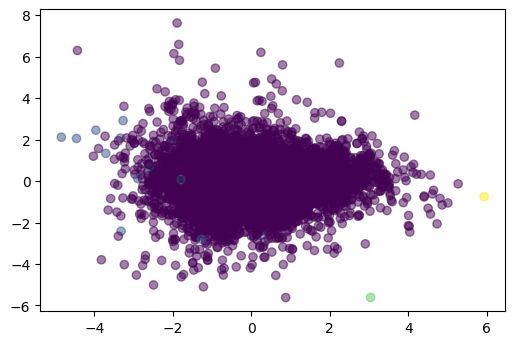

In [ ]:
## Average Linkage
model.Heirarchial_clustering('average', 'euclidean')

Silhouette Score is  0.13283325697498785
Purity Measure is  0.16765378705127995


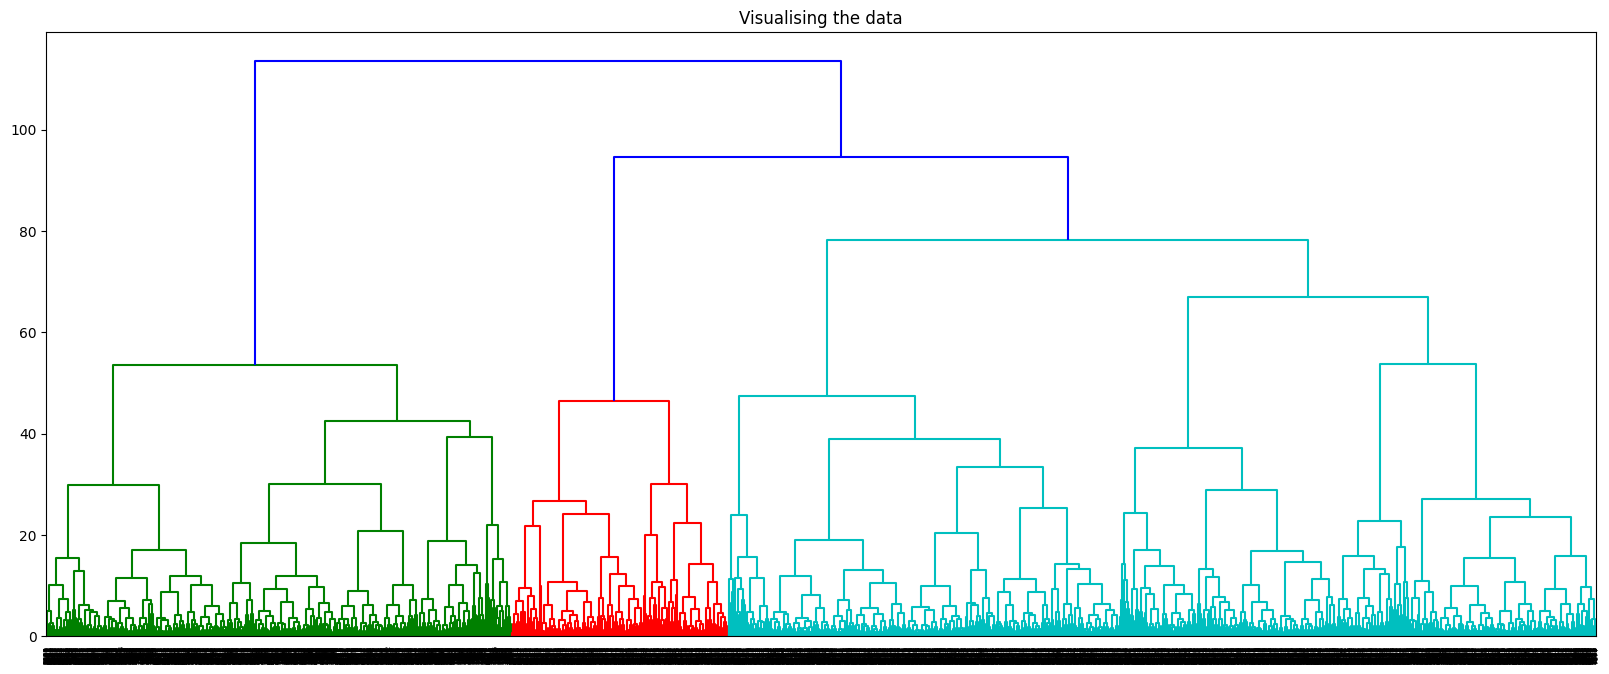

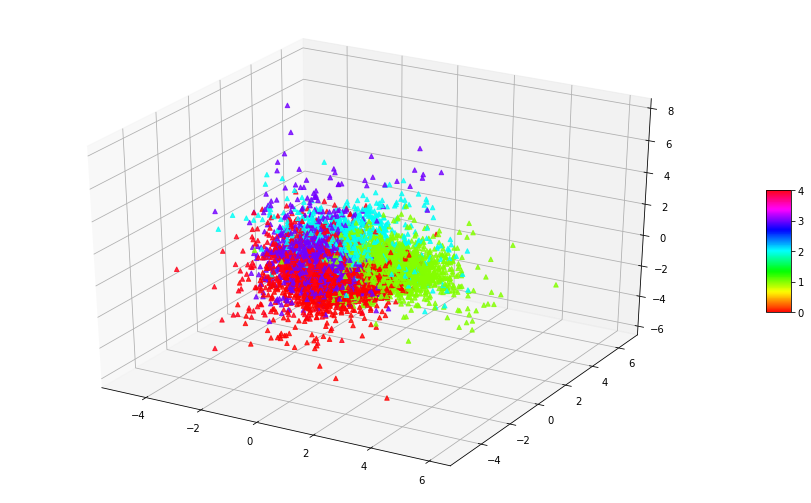

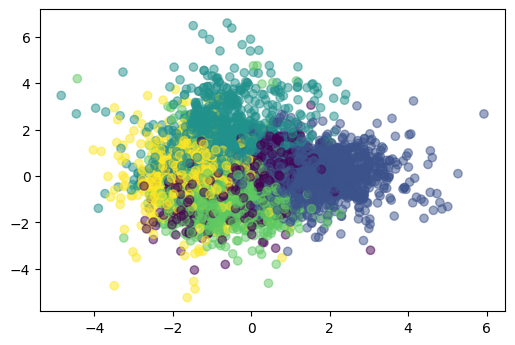

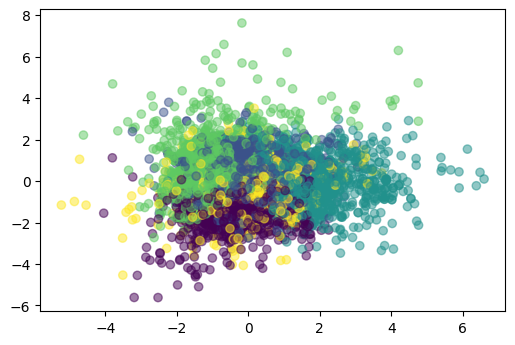

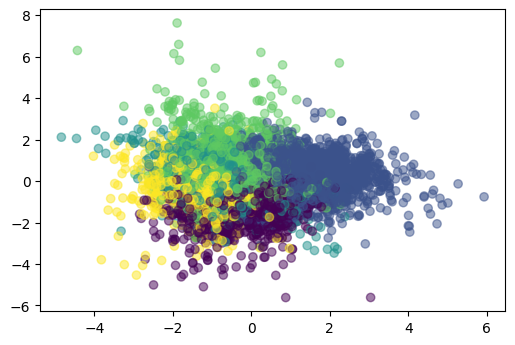

In [ ]:
## Ward Linkage
model.Heirarchial_clustering('ward', 'euclidean')

### DBSCAN

Silhouette Score is  -0.4463805836290344
Purity Measure is  0.1778225285971768


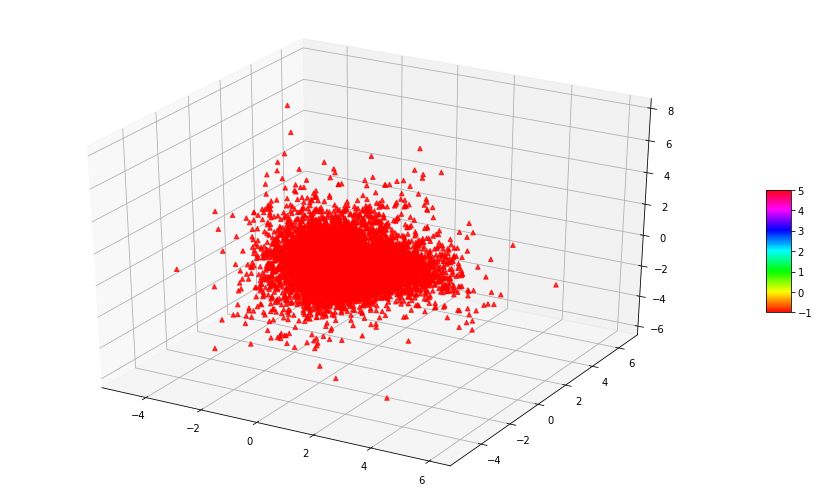

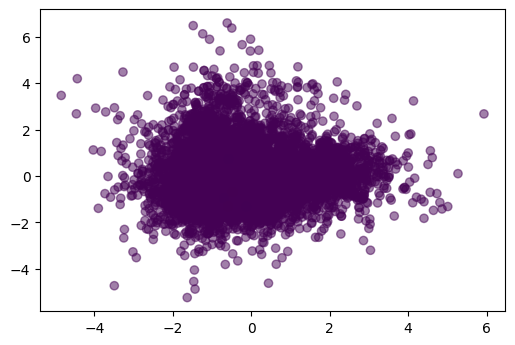

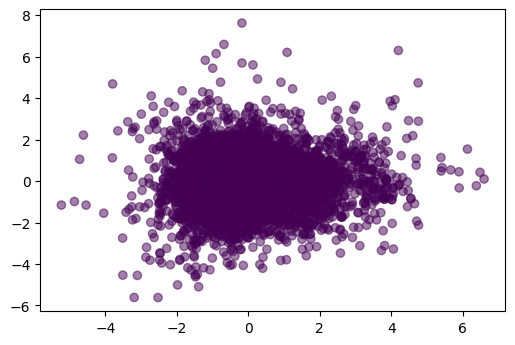

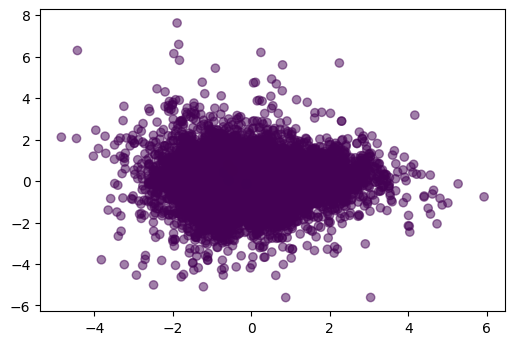

In [ ]:
model.DBSSCAN_clustering(0.0000001, 3)

## Feature Selection

In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(SVC(kernel='linear', gamma='scale', C=5, decision_function_shape= 'ovo'),
          k_features=40,
          forward=True,
          floating=True,
          scoring = 'accuracy',
          cv = 5)
sfs.fit(x_train_std, y_train)

SequentialFeatureSelector(estimator=SVC(C=5, decision_function_shape='ovo',
                                        kernel='linear'),
                          floating=True, k_features=40, scoring='accuracy')

In [ ]:
sfs.k_feature_names_     # to get the final set of features

('0',
 '1',
 '3',
 '4',
 '7',
 '9',
 '11',
 '12',
 '15',
 '16',
 '20',
 '21',
 '25',
 '27',
 '31',
 '32',
 '36',
 '38',
 '40',
 '41',
 '43',
 '44',
 '45',
 '46',
 '52',
 '54',
 '59',
 '60',
 '66',
 '68',
 '69',
 '72',
 '76',
 '80',
 '81',
 '83',
 '87',
 '91',
 '94',
 '95')

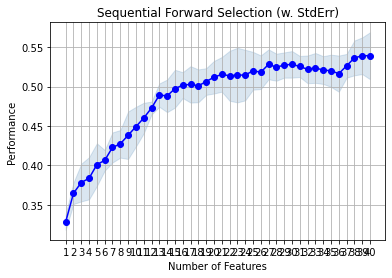

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()